In [1]:
import pandas as pd
import numpy as np

In [2]:
mobility_by_county = pd.read_csv("data/County_Mobility_Report.csv")

In [3]:
mobility_by_county.head()

STATE          COUNTY     date  RETAIL_REC  GROCERY_PHARM  PARKS  \
0  Alabama  Autauga County  2/15/20         5.0            7.0    NaN   
1  Alabama  Autauga County  2/16/20         0.0            1.0  -23.0   
2  Alabama  Autauga County  2/17/20         8.0            0.0    NaN   
3  Alabama  Autauga County  2/18/20        -2.0            0.0    NaN   
4  Alabama  Autauga County  2/19/20        -2.0            0.0    NaN   

   TRANSIT_STATIONS  WORK  HOME  
0               NaN  -4.0   NaN  
1               NaN  -4.0   NaN  
2               NaN -27.0   5.0  
3               NaN   2.0   0.0  
4               NaN   2.0   0.0

In [4]:
mobility_by_county['date'] = pd.to_datetime(mobility_by_county['date'])

In [5]:
mobility_by_date = mobility_by_county.groupby(['date']).mean()
mobility_by_date

RETAIL_REC  GROCERY_PHARM      PARKS  TRANSIT_STATIONS       WORK  \
date                                                                            
2020-02-15    6.480100       2.397742  16.828269          4.343983   0.441883   
2020-02-16    7.992451       2.517363  17.735457          3.821628   0.481786   
2020-02-17    3.809444      -0.362708  28.056198          2.037717 -17.473567   
2020-02-18   -0.183528      -1.272106   5.373437          2.215943   0.009701   
2020-02-19    2.084062       0.583832   8.029641          2.431000   0.895266   
...                ...            ...        ...               ...        ...   
2020-04-26  -31.710882     -10.875648   3.056604        -30.563773 -30.259854   
2020-04-27  -24.568057      -7.140097   7.679339        -25.655240 -34.652747   
2020-04-28  -24.076685      -4.718699  20.809947        -22.517344 -36.584604   
2020-04-29  -23.731125      -4.160685   7.223301        -22.845560 -36.811026   
2020-04-30  -23.701937      -2.749400   2.224684        -23.224708 -36.583788   

                 HOME  
date                   
2020-02-15  -0.559719  
2020-02-16  -0.662776  
2020-02-17   4.330748  
2020-02-18   0.791558  
2020-02-19   0.174920  
...               ...  
2020-04-26   9.921011  
2020-04-27  15.272300  
2020-04-28   9.715050  
2020-04-29  16.036434  
2020-04-30  16.368175  

[76 rows x 6 columns]

In [6]:
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Set plot size
plt.figure(figsize = (15,7))

# Set error bars and line formatting
plt.errorbar(mobility_by_date.index, mobility_by_date["RETAIL_REC"], color="red", linestyle="dashed", linewidth=0.75)
plt.errorbar(mobility_by_date.index, mobility_by_date["GROCERY_PHARM"], color="blue", linestyle="dashed", linewidth=0.75)
plt.errorbar(mobility_by_date.index, mobility_by_date["PARKS"], color="green", linestyle="dashed", linewidth=0.75)
plt.errorbar(mobility_by_date.index, mobility_by_date["TRANSIT_STATIONS"], color="black", linestyle="dashed", linewidth=0.75)
plt.errorbar(mobility_by_date.index, mobility_by_date["WORK"], color="orange", linestyle="dashed", linewidth=0.75)
plt.errorbar(mobility_by_date.index, mobility_by_date["HOME"], color="purple", linestyle="dashed", linewidth=0.75)

# Set descriptors 
plt.title("Change in Mobility Since 2/15/2020", fontsize=18)
plt.xlabel("date", fontsize=12)
plt.ylabel("Change in Mobility", fontsize=12)
plt.grid(linestyle="dotted")
plt.legend(("RETAIL_REC", "GROCERY_PHARM", "PARKS", "TRANSIT_STATIONS", "WORK", "HOME"), fontsize=12)

# Save the Figure
plt.savefig("ChangeInMobility.png")

# Show the Figure
plt.show()

In [8]:
air_quality = pd.read_csv('data/AQI_changes.csv')

In [9]:
air_quality.head()

date    STATE     COUNTY  DAILY_AQI_VALUE  AQI_Base  AQI_change
0  2/15/20  Alabama  Jefferson             31.2      31.2         NaN
1  2/16/20  Alabama  Jefferson             50.2      31.2        19.0
2  2/17/20  Alabama  Jefferson             33.4      31.2         2.2
3  2/18/20  Alabama  Jefferson             21.2      31.2       -10.0
4  2/19/20  Alabama  Jefferson             26.0      31.2        -5.2

In [10]:
air_quality['date'] = pd.to_datetime(air_quality['date'])

In [11]:
air_changes_by_date = air_quality.groupby(['date']).mean()
air_changes_by_date

DAILY_AQI_VALUE   AQI_Base  AQI_change
date                                              
2020-02-15        27.978520  27.978520    0.000000
2020-02-16        34.286224  28.117602    6.168622
2020-02-17        36.216886  28.570833    7.646053
2020-02-18        32.256033  28.386912    3.869121
2020-02-19        27.005696  28.278059   -1.272363
2020-02-20        27.121353  28.304017   -1.182664
2020-02-21        30.075659  28.375659    1.700000
2020-02-22        35.294866  28.088264    7.206601
2020-02-23        35.791495  28.151546    7.639948
2020-02-24        31.327893  28.375413    2.952479
2020-02-25        28.481663  28.265458    0.216205
2020-02-26        24.791807  28.251681   -3.459874
2020-02-27        20.527846  28.473984   -7.946138
2020-02-28        26.137668  28.286099   -2.148430
2020-02-29        25.281316  27.780789   -2.499474
2020-03-01        28.108169  28.115775   -0.007606
2020-03-02        30.409471  28.483921    1.925551
2020-03-03        28.831195  28.428540    0.402655
2020-03-04        23.423414  28.324289   -4.900875
2020-03-05        24.591667  28.344737   -3.753070
2020-03-06        23.328509  28.442325   -5.113816
2020-03-07        23.443333  28.250000   -4.806667
2020-03-08        28.791351  28.512162    0.279189
2020-03-09        30.352009  28.477009    1.875000
2020-03-10        28.469845  28.388914    0.080931
2020-03-11        28.957871  28.374501    0.583370
2020-03-12        31.555408  28.286755    3.268653
2020-03-13        23.542257  28.491593   -4.949336
2020-03-14        21.394286  28.210390   -6.816104
2020-03-15        22.830978  28.570652   -5.739674
2020-03-16        26.111538  28.385747   -2.274208
2020-03-17        28.639819  28.472398    0.167421
2020-03-18        30.527928  28.588964    1.938964
2020-03-19        29.598582  28.843972    0.754610
2020-03-20        26.057343  28.571562   -2.514219
2020-03-21        22.836240  28.362398   -5.526158
2020-03-22        27.219186  28.492442   -1.273256
2020-03-23        24.544393  28.599299   -4.054907
2020-03-24        25.174584  28.512352   -3.337767
2020-03-25        26.776636  28.678037   -1.901402
2020-03-26        30.306308  28.572897    1.733411
2020-03-27        36.033732  28.604067    7.429665
2020-03-28        34.088857  28.454857    5.634000
2020-03-29        23.090964  28.725602   -5.634639
2020-03-30        19.650361  28.630120   -8.979759
2020-03-31        19.991253  28.653664   -8.662411
2020-04-01        21.291388  28.676316   -7.384928
2020-04-02        22.499012  28.518272   -6.019259
2020-04-03        23.966332  28.595980   -4.629648
2020-04-04        28.238746  28.578063   -0.339316
2020-04-05        31.217560  28.796429    2.421131
2020-04-06        30.509785  28.646062    1.863723
2020-04-07        33.856699  28.598086    5.258612
2020-04-08        31.776526  28.792019    2.984507
2020-04-09        24.464477  28.640389   -4.175912
2020-04-10        22.511663  28.319355   -5.807692
2020-04-11        30.491404  28.534957    1.956447

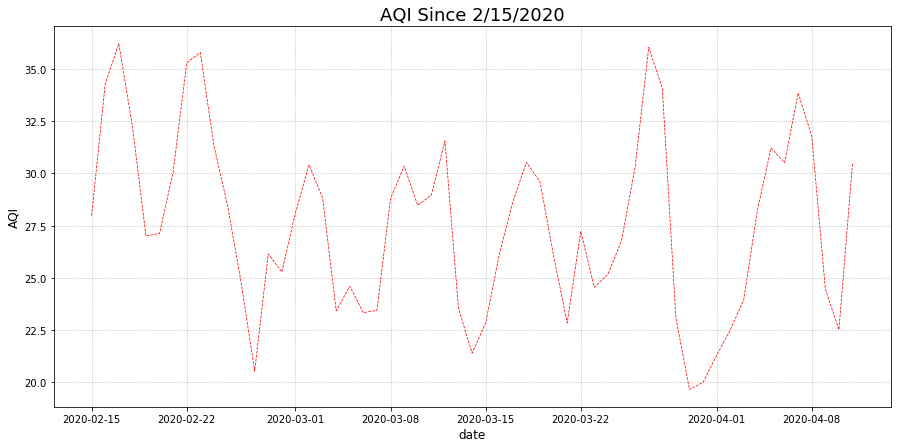

In [14]:
#Set plot size
plt.figure(figsize = (15,7))

# Set error bars and line formatting
plt.errorbar(air_changes_by_date.index, air_changes_by_date["DAILY_AQI_VALUE"], color="red", linestyle="dashed", linewidth=0.75)
#plt.errorbar(air_changes_by_date.index, air_changes_by_date["DAILY_AQI_VALUE"], color="blue", linestyle="dashed", linewidth=0.75)


# Set descriptors 
plt.title("AQI Since 2/15/2020", fontsize=18)
plt.xlabel("date", fontsize=12)
plt.ylabel("AQI", fontsize=12)
plt.grid(linestyle="dotted")
#plt.legend(("AQI_change", "DAILY_AQI_VALUE"), fontsize=12)

# Save the Figure
#plt.savefig("ChangeInAQI.png")

# Show the Figure
plt.show()

In [15]:
merged_to_model = pd.read_csv("data/air_movement_changes.csv")
merged_to_model.head()

Unnamed: 0     date    STATE     COUNTY  DAILY_AQI_VALUE  AQI_Base  \
0           0  2/15/20  Alabama  Jefferson             31.2      31.2   
1           1  2/16/20  Alabama  Jefferson             50.2      31.2   
2           2  2/17/20  Alabama  Jefferson             33.4      31.2   
3           3  2/18/20  Alabama  Jefferson             21.2      31.2   
4           4  2/19/20  Alabama  Jefferson             26.0      31.2   

   AQI_change  RETAIL_REC  GROCERY_PHARM  PARKS  TRANSIT_STATIONS  WORK  HOME  
0         NaN         4.0            1.0  109.0               3.0   2.0   0.0  
1        19.0         2.0           -3.0   12.0              -2.0  -1.0   0.0  
2         2.2         3.0            1.0   23.0              -3.0 -14.0   4.0  
3       -10.0        -9.0           -8.0  -27.0               0.0  -1.0   2.0  
4        -5.2         1.0            1.0  -12.0              -1.0   1.0   0.0

In [16]:
merged_to_model.drop(['Unnamed: 0'], axis=1)

date    STATE      COUNTY  DAILY_AQI_VALUE  AQI_Base  AQI_change  \
0      2/15/20  Alabama   Jefferson             31.2      31.2         NaN   
1      2/16/20  Alabama   Jefferson             50.2      31.2        19.0   
2      2/17/20  Alabama   Jefferson             33.4      31.2         2.2   
3      2/18/20  Alabama   Jefferson             21.2      31.2       -10.0   
4      2/19/20  Alabama   Jefferson             26.0      31.2        -5.2   
...        ...      ...         ...              ...       ...         ...   
24264   4/6/20  Wyoming  Sweetwater             11.0       5.0         6.0   
24265   4/7/20  Wyoming  Sweetwater             11.0       5.0         6.0   
24266   4/8/20  Wyoming  Sweetwater              8.0       5.0         3.0   
24267   4/9/20  Wyoming  Sweetwater              6.0       5.0         1.0   
24268  4/10/20  Wyoming  Sweetwater              4.0       5.0        -1.0   

       RETAIL_REC  GROCERY_PHARM  PARKS  TRANSIT_STATIONS  WORK  HOME  
0             4.0            1.0  109.0               3.0   2.0   0.0  
1             2.0           -3.0   12.0              -2.0  -1.0   0.0  
2             3.0            1.0   23.0              -3.0 -14.0   4.0  
3            -9.0           -8.0  -27.0               0.0  -1.0   2.0  
4             1.0            1.0  -12.0              -1.0   1.0   0.0  
...           ...            ...    ...               ...   ...   ...  
24264       -29.0           -8.0    NaN              -1.0 -31.0  11.0  
24265       -29.0           -1.0    NaN               2.0 -36.0  12.0  
24266       -29.0            1.0    NaN               5.0 -36.0  12.0  
24267       -29.0            2.0    NaN               4.0 -36.0  11.0  
24268       -28.0            3.0    NaN              27.0 -44.0  15.0  

[24269 rows x 12 columns]

In [21]:
merged_to_model['date'] = pd.to_datetime(merged_to_model['date'])

In [14]:
#AQI = pd.DataFrame(merged_air_movement.groupby(['STATE']).mean()['DAILY_AQI_VALUE'])
#AQI.head()

DAILY_AQI_VALUE
STATE                      
Alabama           36.110508
Alaska            18.458101
Arizona           18.506951
Arkansas          28.828087
California        24.238061

In [17]:
scatter = pd.read_csv("data/test_regression.csv")
scatter.head()

date  AQI_change  RETAIL_REC  GROCERY_PHARM      PARKS  \
0  2/15/20    0.000000    5.009434       1.207547  16.197861   
1  2/16/20    6.326448    8.095718       1.536524  19.747875   
2  2/17/20    7.824512    7.273319       0.650759  30.464072   
3  2/18/20    4.111111    0.389899      -0.933198   6.787115   
4  2/19/20   -1.271042    2.227083       0.534447  10.548023   

   TRANSIT_STATIONS       WORK      HOME  
0          4.239011   0.264151 -0.505910  
1          3.173021   0.335013 -0.747475  
2         -1.834211 -22.633406  4.963043  
3          2.857868  -0.668687  0.662626  
4          3.012987   0.314583  0.164583

In [21]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = scatter["AQI_change"].values.reshape(-1, 1)
y = scatter["PARKS"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (57, 1) (57, 1)


In [22]:
#data["AQI_change"].plot(figsize=(20,12));
### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("AQI_change")
plt.ylabel("PARKS")
### END SOLUTION

Text(0, 0.5, 'PARKS')